In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the ANN architecture
input_dim = 2
hidden_dim = 2
output_dim = 1

# Initialize weights and biases
weights1 = np.random.rand(input_dim, hidden_dim)
weights2 = np.random.rand(hidden_dim, output_dim)
bias1 = np.zeros((1, hidden_dim))
bias2 = np.zeros((1, output_dim))

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Train the ANN
learning_rate = 0.1
losses = []
for epoch in range(10000):
    # Forward pass
    hidden_layer = sigmoid(np.dot(X, weights1) + bias1)
    output_layer = sigmoid(np.dot(hidden_layer, weights2) + bias2)

    # Calculate loss
    loss = np.mean((output_layer - y) ** 2)
    losses.append(loss)

    # Backward pass
    output_error = 2 * (output_layer - y) * sigmoid_derivative(output_layer)
    hidden_error = output_error.dot(weights2.T) * sigmoid_derivative(hidden_layer)

    # Weight updates
    weights2 -= learning_rate * hidden_layer.T.dot(output_error)
    weights1 -= learning_rate * X.T.dot(hidden_error)
    bias2 -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
    bias1 -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)



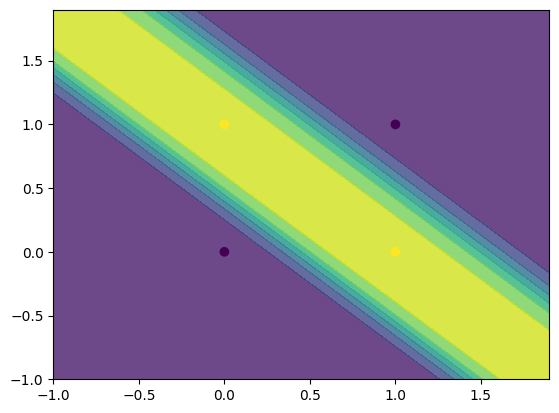

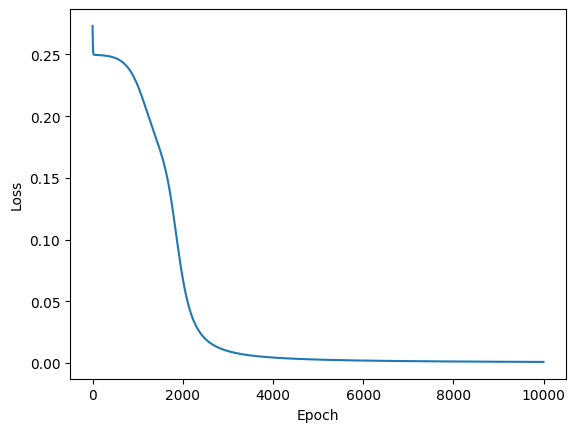

In [3]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = sigmoid(np.dot(sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights1) + bias1), weights2) + bias2)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel())
plt.show()

# Plot loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()